In [1]:
from keras.datasets import mnist
from keras.layers import Flatten, Conv2D, MaxPool2D, Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import plot_model, to_categorical

import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#数据变成TensorFow为Backend的形式
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
#把标签变成one-hot编码的形式
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [3]:
# 构建LeNet-5网络
model = Sequential()
model.add(Conv2D(input_shape = (28,28,1), filters=6, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(input_shape=(14,14,6), filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

Epoch 1/30
60000/60000 [==============================] - 11s 189us/step - loss: 0.9287 - acc: 0.7676
Epoch 2/30
60000/60000 [==============================] - 12s 194us/step - loss: 0.3284 - acc: 0.9180
Epoch 3/30
60000/60000 [==============================] - 11s 185us/step - loss: 0.2356 - acc: 0.9375
Epoch 4/30
60000/60000 [==============================] - 11s 186us/step - loss: 0.1897 - acc: 0.9479
Epoch 5/30
60000/60000 [==============================] - 11s 191us/step - loss: 0.1618 - acc: 0.9543
Epoch 6/30
60000/60000 [==============================] - 11s 187us/step - loss: 0.1432 - acc: 0.9591
Epoch 7/30
60000/60000 [==============================] - 11s 188us/step - loss: 0.1308 - acc: 0.9622
Epoch 8/30
60000/60000 [==============================] - 13s 209us/step - loss: 0.1185 - acc: 0.9658
Epoch 9/30
60000/60000 [==============================] - 13s 213us/step - loss: 0.1121 - acc: 0.9675
Epoch 10/30
60000/60000 [==============================] - 11s 184us/step - loss: 

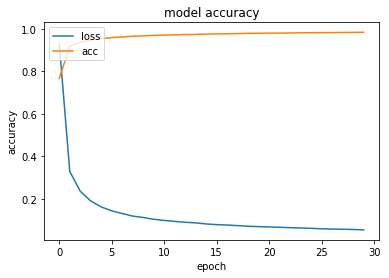

In [4]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=30)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss','acc'], loc='upper left')
plt.show()

In [5]:
score=model.evaluate(x_test,y_test)
print("Testing Loss:", score[0])
print("Testing Accuracy of:", score[1])

10000/10000 [==============================] - 1s 133us/step
Testing Loss: 0.056708887127041814
Testing Accuracy of: 0.9825
